### **moving average**

In [ ]:
import pandas as pd
import numpy as np

# Baca data dari CSV
df = pd.read_csv('data0.2.0.csv')

# Pilih kolom 'cpu_util' untuk perhitungan moving average
column_name = 'cpu_util'

# Hitung moving average dengan jendela lebar tertentu (misalnya, 10 data terakhir)
window_size = 10
df['moving_avg_cpu'] = df[column_name].rolling(window=window_size).mean()

# Tentukan threshold untuk menandai anomali (contoh: 2 kali standar deviasi dari moving average)
threshold =  1.3 * df['moving_avg_cpu'].std()

# Tambahkan kolom 'anomaly' yang berisi 1 jika nilai 'cpu_util' melampaui threshold, dan 0 sebaliknya
df['anomalycpu'] = np.where(df[column_name] > (df['moving_avg_cpu'] + threshold), 1, 0)

# Tampilkan hasil
print(df)


                      date  cpu_util    memory  moving_avg_cpu  anomalycpu
0      2023-06-13 00:03:05  0.783467  0.585824             NaN           0
1      2023-06-13 00:08:05  0.961510  0.658476             NaN           0
2      2023-06-13 00:13:05  0.870772  0.487669             NaN           0
3      2023-06-13 00:18:05  0.700888  0.820553             NaN           0
4      2023-06-13 00:23:05  0.855293  0.762595             NaN           0
...                    ...       ...       ...             ...         ...
49819  2023-12-02 23:38:09  0.133470  0.833923        0.138493           0
49820  2023-12-02 23:43:09  0.108620  0.705284        0.128736           0
49821  2023-12-02 23:48:09  0.071554  0.857364        0.112486           0
49822  2023-12-02 23:53:09  0.201468  0.835667        0.114677           0
49823  2023-12-02 23:58:09  0.000000  0.850301        0.107356           0

[49824 rows x 5 columns]


In [ ]:
df

,date,cpu_util,memory,moving_avg_cpu,anomalycpu
0,2023-06-13 00:03:05,0.783467,0.585824,NaN,0
1,2023-06-13 00:08:05,0.961510,0.658476,NaN,0
2,2023-06-13 00:13:05,0.870772,0.487669,NaN,0
3,2023-06-13 00:18:05,0.700888,0.820553,NaN,0
4,2023-06-13 00:23:05,0.855293,0.762595,NaN,0
...,...,...,...,...,...
49819,2023-12-02 23:38:09,0.133470,0.833923,0.138493,0
49820,2023-12-02 23:43:09,0.108620,0.705284,0.128736,0
49821,2023-12-02 23:48:09,0.071554,0.857364,0.112486,0
49822,2023-12-02 23:53:09,0.201468,0.835667,0.114677,0


In [ ]:
# Menampilkan jumlah data yang memiliki nilai 1 di kolom 'anomaly'
jumlah_anomali = df['anomalycpu'].sum()

print("Jumlah data dengan nilai anomaly = 1:", jumlah_anomali)


Jumlah data dengan nilai anomaly = 1: 294


In [ ]:
'''import pandas as pd
import matplotlib.pyplot as plt

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['cpu_util'], label='CPU Utilization')
plt.scatter(df[df['label'] == 1]['date'], df[df['label'] == 1]['cpu_util'], color='red', label='Anomaly')
plt.xlabel('Date')
plt.ylabel('CPU Utilization')
plt.legend()
plt.show()
'''

"import pandas as pd\nimport matplotlib.pyplot as plt\n\n# Create the plot\nplt.figure(figsize=(12, 6))\nplt.plot(df['date'], df['cpu_util'], label='CPU Utilization')\nplt.scatter(df[df['label'] == 1]['date'], df[df['label'] == 1]['cpu_util'], color='red', label='Anomaly')\nplt.xlabel('Date')\nplt.ylabel('CPU Utilization')\nplt.legend()\nplt.show()\n"

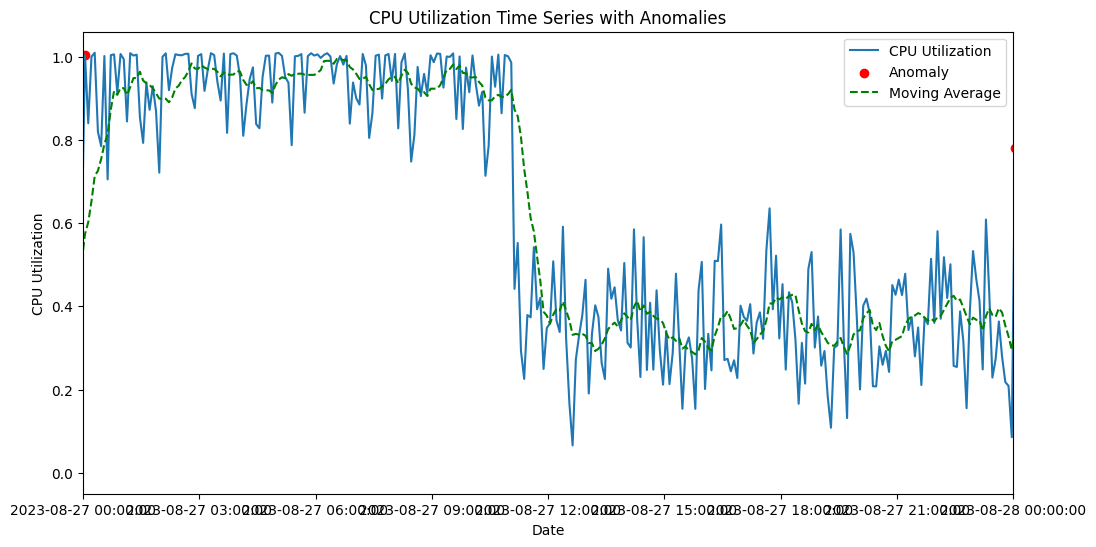

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# Konversi kolom 'date' ke dalam format datetime
df['date'] = pd.to_datetime(df['date'])

# Plot time series data 'cpu_util'
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['cpu_util'], label='CPU Utilization')

# Tambahkan marker merah untuk data yang dianggap sebagai anomali
anomaly_points = df[df['anomalycpu'] == 1]
plt.scatter(anomaly_points['date'], anomaly_points['cpu_util'], color='red', label='Anomaly')

# Tambahkan moving average ke dalam plot

plt.plot(df['date'], df['moving_avg_cpu'], label='Moving Average', linestyle='--', color='green')




# Konfigurasi label dan format sumbu x
plt.xlabel('Date')
plt.ylabel('CPU Utilization')
plt.xlim(pd.Timestamp('2023-08-27'),pd.Timestamp('2023-08-28'))
plt.title('CPU Utilization Time Series with Anomalies')
plt.legend()
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))

# Menampilkan plot
plt.show()


## memory

In [ ]:
# Pilih kolom 'cpu_util' untuk perhitungan moving average
column_name = 'memory'

# Hitung moving average dengan jendela lebar tertentu (misalnya, 10 data terakhir)
window_size = 5
df['moving_avg_memory'] = df[column_name].rolling(window=window_size).mean()

# Tentukan threshold untuk menandai anomali (contoh: 2 kali standar deviasi dari moving average)
threshold =  0.5 * df['moving_avg_memory'].std()

# Tambahkan kolom 'anomaly' yang berisi 1 jika nilai 'cpu_util' melampaui threshold, dan 0 sebaliknya
df['anomalymemory'] = np.where(df[column_name] > (df['moving_avg_memory'] + threshold), 1, 0)

# Tampilkan hasil
print(df)

                     date  cpu_util    memory  moving_avg_cpu  anomalycpu  \
0     2023-06-13 00:03:05  0.783467  0.585824             NaN           0   
1     2023-06-13 00:08:05  0.961510  0.658476             NaN           0   
2     2023-06-13 00:13:05  0.870772  0.487669             NaN           0   
3     2023-06-13 00:18:05  0.700888  0.820553             NaN           0   
4     2023-06-13 00:23:05  0.855293  0.762595             NaN           0   
...                   ...       ...       ...             ...         ...   
49819 2023-12-02 23:38:09  0.133470  0.833923        0.138493           0   
49820 2023-12-02 23:43:09  0.108620  0.705284        0.128736           0   
49821 2023-12-02 23:48:09  0.071554  0.857364        0.112486           0   
49822 2023-12-02 23:53:09  0.201468  0.835667        0.114677           0   
49823 2023-12-02 23:58:09  0.000000  0.850301        0.107356           0   

       moving_avg_memory  anomalymemory  
0                    NaN         

In [ ]:
# Menampilkan jumlah data yang memiliki nilai 1 di kolom 'anomaly'
jumlah_anomali = df['anomalymemory'].sum()

print("Jumlah data dengan nilai anomaly = 1:", jumlah_anomali)

Jumlah data dengan nilai anomaly = 1: 7410


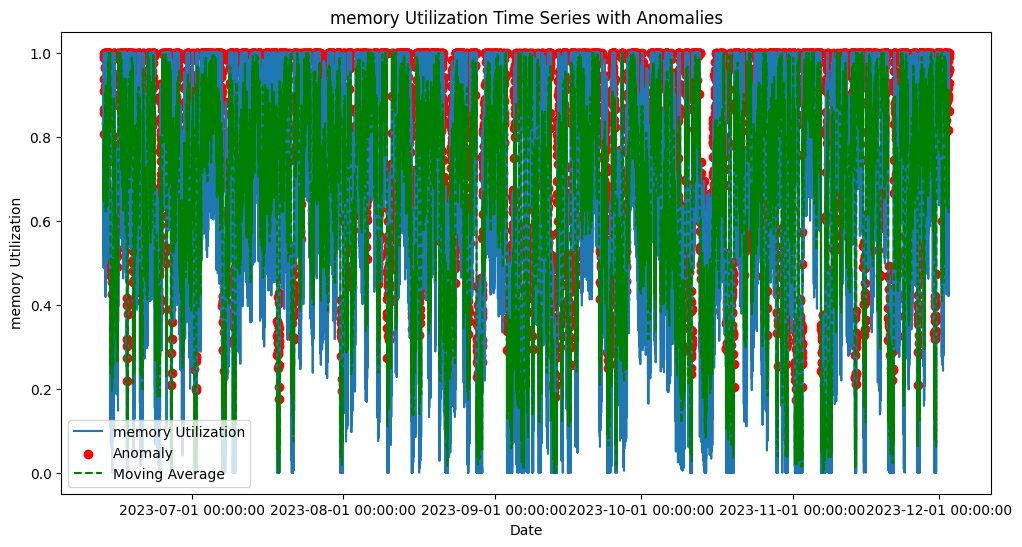

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Konversi kolom 'date' ke dalam format datetime
df['date'] = pd.to_datetime(df['date'])

# Plot time series data 'cpu_util'
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['memory'], label='memory Utilization')

# Tambahkan marker merah untuk data yang dianggap sebagai anomali
anomaly_points = df[df['anomalymemory'] == 1]
plt.scatter(anomaly_points['date'], anomaly_points['memory'], color='red', label='Anomaly')

# Tambahkan moving average ke dalam plot
plt.plot(df['date'], df['moving_avg_memory'], label='Moving Average', linestyle='--', color='green')

# Konfigurasi label dan format sumbu x
plt.xlabel('Date')
plt.ylabel('memory Utilization')
plt.title('memory Utilization Time Series with Anomalies')
plt.legend()
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))

# Menampilkan plot
plt.show()

In [ ]:
df

,date,cpu_util,memory,moving_avg_cpu,anomalycpu,moving_avg_memory,anomalymemory
0,2023-06-13 00:03:05,0.783467,0.585824,NaN,0,NaN,0
1,2023-06-13 00:08:05,0.961510,0.658476,NaN,0,NaN,0
2,2023-06-13 00:13:05,0.870772,0.487669,NaN,0,NaN,0
3,2023-06-13 00:18:05,0.700888,0.820553,NaN,0,NaN,0
4,2023-06-13 00:23:05,0.855293,0.762595,NaN,0,0.663023,0
...,...,...,...,...,...,...,...
49819,2023-12-02 23:38:09,0.133470,0.833923,0.138493,0,0.838743,0
49820,2023-12-02 23:43:09,0.108620,0.705284,0.128736,0,0.808741,0
49821,2023-12-02 23:48:09,0.071554,0.857364,0.112486,0,0.843336,0
49822,2023-12-02 23:53:09,0.201468,0.835667,0.114677,0,0.846448,0


In [ ]:
'''
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# Normalisasi data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[['cpu_util']])

# Membuat data time series
time_steps = 10  # Adjust the number of time steps as needed
X, y = [], []
for i in range(len(df) - time_steps):
    X.append(scaled_data[i:(i + time_steps), 0])
    y.append(scaled_data[i + time_steps, 0])
X, y = np.array(X), np.array(y)

# Reshape data untuk LSTM
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Membangun model LSTM
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Melatih model
model.fit(X, y, epochs=3, batch_size=32)

# Melakukan prediksi
predictions = model.predict(X)

# Denormalisasi prediksi
predictions = scaler.inverse_transform(predictions)

# Plot hasil prediksi dan data observasi
plt.plot(df['date'][time_steps:], df['cpu_util'][time_steps:], label='Actual CPU Utilization')
plt.plot(df['date'][time_steps:], predictions, label='Predicted CPU Utilization', linestyle='--')
plt.xlabel('Date')
plt.ylabel('CPU Utilization')
plt.title('CPU Utilization Prediction with LSTM')
plt.legend()
plt.show()
'''

"\nfrom tensorflow.keras.models import Sequential\nfrom tensorflow.keras.layers import LSTM, Dense\nfrom sklearn.preprocessing import MinMaxScaler\n\n# Normalisasi data\nscaler = MinMaxScaler()\nscaled_data = scaler.fit_transform(df[['cpu_util']])\n\n# Membuat data time series\ntime_steps = 10  # Adjust the number of time steps as needed\nX, y = [], []\nfor i in range(len(df) - time_steps):\n    X.append(scaled_data[i:(i + time_steps), 0])\n    y.append(scaled_data[i + time_steps, 0])\nX, y = np.array(X), np.array(y)\n\n# Reshape data untuk LSTM\nX = np.reshape(X, (X.shape[0], X.shape[1], 1))\n\n# Membangun model LSTM\nmodel = Sequential()\nmodel.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))\nmodel.add(LSTM(units=50, return_sequences=False))\nmodel.add(Dense(units=1))\nmodel.compile(optimizer='adam', loss='mean_squared_error')\n\n# Melatih model\nmodel.fit(X, y, epochs=3, batch_size=32)\n\n# Melakukan prediksi\npredictions = model.predict(X)\n\n# Denormalisasi

In [ ]:
# Membuat DataFrame dfcpu
dfcpu = df[['date', 'cpu_util', 'moving_avg_cpu', 'anomalycpu']]

# Membuat DataFrame dfmemory
dfmemory = df[['date', 'memory', 'moving_avg_memory', 'anomalymemory']]


In [ ]:
dfcpu

,date,cpu_util,moving_avg_cpu,anomalycpu
0,2023-06-13 00:03:05,0.783467,NaN,0
1,2023-06-13 00:08:05,0.961510,NaN,0
2,2023-06-13 00:13:05,0.870772,NaN,0
3,2023-06-13 00:18:05,0.700888,NaN,0
4,2023-06-13 00:23:05,0.855293,NaN,0
...,...,...,...,...
49819,2023-12-02 23:38:09,0.133470,0.138493,0
49820,2023-12-02 23:43:09,0.108620,0.128736,0
49821,2023-12-02 23:48:09,0.071554,0.112486,0
49822,2023-12-02 23:53:09,0.201468,0.114677,0


In [ ]:
dfmemory


,date,memory,moving_avg_memory,anomalymemory
0,2023-06-13 00:03:05,0.585824,NaN,0
1,2023-06-13 00:08:05,0.658476,NaN,0
2,2023-06-13 00:13:05,0.487669,NaN,0
3,2023-06-13 00:18:05,0.820553,NaN,0
4,2023-06-13 00:23:05,0.762595,0.663023,0
...,...,...,...,...
49819,2023-12-02 23:38:09,0.833923,0.838743,0
49820,2023-12-02 23:43:09,0.705284,0.808741,0
49821,2023-12-02 23:48:09,0.857364,0.843336,0
49822,2023-12-02 23:53:09,0.835667,0.846448,0


In [ ]:
# Menambahkan kolom leg1, leg2, leg3, dan leg4
df['leg1'] = df['cpu_util'].shift(1)
df['leg2'] = df['cpu_util'].shift(2)
df['leg3'] = df['cpu_util'].shift(3)
df['leg4'] = df['cpu_util'].shift(4)


In [ ]:
df

,date,cpu_util,memory,moving_avg_cpu,anomalycpu,moving_avg_memory,anomalymemory,leg1,leg2,leg3,leg4
0,2023-06-13 00:03:05,0.783467,0.585824,NaN,0,NaN,0,NaN,NaN,NaN,NaN
1,2023-06-13 00:08:05,0.961510,0.658476,NaN,0,NaN,0,0.783467,NaN,NaN,NaN
2,2023-06-13 00:13:05,0.870772,0.487669,NaN,0,NaN,0,0.961510,0.783467,NaN,NaN
3,2023-06-13 00:18:05,0.700888,0.820553,NaN,0,NaN,0,0.870772,0.961510,0.783467,NaN
4,2023-06-13 00:23:05,0.855293,0.762595,NaN,0,0.663023,0,0.700888,0.870772,0.961510,0.783467
...,...,...,...,...,...,...,...,...,...,...,...
49819,2023-12-02 23:38:09,0.133470,0.833923,0.138493,0,0.838743,0,0.011253,0.208861,0.012968,0.187778
49820,2023-12-02 23:43:09,0.108620,0.705284,0.128736,0,0.808741,0,0.133470,0.011253,0.208861,0.012968
49821,2023-12-02 23:48:09,0.071554,0.857364,0.112486,0,0.843336,0,0.108620,0.133470,0.011253,0.208861
49822,2023-12-02 23:53:09,0.201468,0.835667,0.114677,0,0.846448,0,0.071554,0.108620,0.133470,0.011253


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Load data
# (pastikan Anda sudah memiliki DataFrame 'df' yang berisi data time series lengkap)

# Drop baris dengan nilai NaN
df = df.dropna()

# Pisahkan fitur dan label
features = ['cpu_util','leg1', 'leg2', 'leg3', 'leg4']
X = df[features]
y = df['anomalycpu']

# Normalisasi data
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Pisahkan data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Reshape data untuk LSTM
X_train_reshaped = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_reshaped = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Bangun model
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], 1)))
model.add(Dense(1, activation='sigmoid'))

# Kompilasi model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Latih model
model.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, validation_data=(X_test_reshaped, y_test))




Epoch 1/10
1246/1246 [==============================] - 10s 6ms/step - loss: 0.0441 - accuracy: 0.9902 - val_loss: 0.0117 - val_accuracy: 0.9963
Epoch 2/10
1246/1246 [==============================] - 12s 10ms/step - loss: 0.0141 - accuracy: 0.9962 - val_loss: 0.0115 - val_accuracy: 0.9961
Epoch 3/10
1246/1246 [==============================] - 10s 8ms/step - loss: 0.0114 - accuracy: 0.9969 - val_loss: 0.0048 - val_accuracy: 0.9989
Epoch 4/10
1246/1246 [==============================] - 6s 5ms/step - loss: 0.0104 - accuracy: 0.9973 - val_loss: 0.0081 - val_accuracy: 0.9985
Epoch 5/10
1246/1246 [==============================] - 8s 6ms/step - loss: 0.0098 - accuracy: 0.9976 - val_loss: 0.0053 - val_accuracy: 0.9984
Epoch 6/10
1246/1246 [==============================] - 6s 5ms/step - loss: 0.0096 - accuracy: 0.9975 - val_loss: 0.0048 - val_accuracy: 0.9984
Epoch 7/10
1246/1246 [==============================] - 8s 7ms/step - loss: 0.0092 - accuracy: 0.9975 - val_loss: 0.0059 - val_accur

In [ ]:
# Evaluasi model
eval_result = model.evaluate(X_test_reshaped, y_test)
print(f"Accuracy: {eval_result[1]*100:.2f}%")

# Prediksi pada data uji
predictions = model.predict(X_test_reshaped)

# Ambil nilai probabilitas anomali
anomaly_probabilities = predictions.flatten()

# Tentukan batas ambang untuk menentukan anomali
threshold = 0.5
predicted_anomalies = (anomaly_probabilities > threshold).astype(int)

# Tampilkan hasil prediksi anomali
result_df = pd.DataFrame({'Anomaly_Probability': anomaly_probabilities, 'Predicted_Anomaly': predicted_anomalies})
result_df['True_Anomaly'] = y_test.values
print(result_df)

312/312 [==============================] - 1s 3ms/step - loss: 0.0046 - accuracy: 0.9984
Accuracy: 99.84%
312/312 [==============================] - 2s 3ms/step
      Anomaly_Probability  Predicted_Anomaly  True_Anomaly
0                0.000013                  0             0
1                0.000011                  0             0
2                0.000002                  0             0
3                0.000002                  0             0
4                0.001422                  0             0
...                   ...                ...           ...
9958             0.000812                  0             0
9959             0.000100                  0             0
9960             0.002439                  0             0
9961             0.000003                  0             0
9962             0.000013                  0             0

[9963 rows x 3 columns]


In [ ]:
result_df


,Anomaly_Probability,Predicted_Anomaly,True_Anomaly
0,0.000013,0,0
1,0.000011,0,0
2,0.000002,0,0
3,0.000002,0,0
4,0.001422,0,0
...,...,...,...
9958,0.000812,0,0
9959,0.000100,0,0
9960,0.002439,0,0
9961,0.000003,0,0


In [ ]:
model.save('model0.2.3.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
